In [12]:
import pandas as pd
# reading in the csv
global_temperature_statistics = pd.read_csv("datasets/Global/GlobalLandTemperaturesByCountry.csv").copy()
global_economy_statistics = pd.read_csv("datasets/Global/Global Economy Indicators.csv").copy()

In [13]:
global_temperature_statistics['AverageTemperature'] = global_temperature_statistics["AverageTemperature"].fillna(0)
global_economy_statistics = global_economy_statistics[global_economy_statistics["Year"].astype(float) < 2013]
global_economy_statistics['Country'] = global_economy_statistics['Country'].apply(lambda x: x.strip())

In [14]:
# was trying to figure out for a while why 2013 wasn't included in the refined dataset and its because the dataset hadn't recorded 12 months of 2013 (dataset ends at September 2013) so I'm going to do up to the end of 2012
average_year_temperature = 0
year_column = []
temperature_column = []
country_column = []
for index, row in global_temperature_statistics.iterrows():
    date = row['dt']
    month = int(date[5:7])
    year = int(date[:4])
    country = row["Country"]
    average_monthly_temperature = float(row['AverageTemperature'])
    if year < 1970 or year > 2012:
        continue
    average_year_temperature += average_monthly_temperature
    if month == 12:
        year_column.append(year)
        temperature_column.append(average_year_temperature / 12)
        country_column.append(row["Country"])
        average_year_temperature = 0

In [15]:
refined_global_temperature_data = {"Year" : year_column, "Yearly Average Temperature" : temperature_column, "Country" : country_column}
refined_global_temperature_statistics = pd.DataFrame(refined_global_temperature_data)
refined_global_temperature_statistics

Year  Yearly Average Temperature   Country
0      1970                    4.442833     Åland
1      1971                    5.623750     Åland
2      1972                    6.358333     Åland
3      1973                    6.198083     Åland
4      1974                    6.766917     Åland
...     ...                         ...       ...
10444  2008                   21.545583  Zimbabwe
10445  2009                   21.377250  Zimbabwe
10446  2010                   21.986250  Zimbabwe
10447  2011                   21.602417  Zimbabwe
10448  2012                   21.521333  Zimbabwe

[10449 rows x 3 columns]

In [16]:
countries_we_need = set(refined_global_temperature_statistics["Country"].tolist()) & set((global_economy_statistics["Country"].tolist()))
refined_global_temperature_statistics = refined_global_temperature_statistics[refined_global_temperature_statistics["Country"].isin(countries_we_need)]
refined_global_temperature_statistics.reset_index()

index  Year  Yearly Average Temperature      Country
0        43  1970                   14.783083  Afghanistan
1        44  1971                   14.823500  Afghanistan
2        45  1972                   12.547167  Afghanistan
3        46  1973                   14.235500  Afghanistan
4        47  1974                   13.316750  Afghanistan
...     ...   ...                         ...          ...
7219  10444  2008                   21.545583     Zimbabwe
7220  10445  2009                   21.377250     Zimbabwe
7221  10446  2010                   21.986250     Zimbabwe
7222  10447  2011                   21.602417     Zimbabwe
7223  10448  2012                   21.521333     Zimbabwe

[7224 rows x 4 columns]

In [17]:
global_economy_statistics = global_economy_statistics[global_economy_statistics['Country'].isin(countries_we_need)]
global_economy_statistics.reset_index()

index  CountryID      Country  Year   AMA exchange rate    Population   \
0         0          4  Afghanistan  1970             0.044998      10752971   
1         1          4  Afghanistan  1971             0.044998      11015857   
2         2          4  Afghanistan  1972             0.044998      11286753   
3         3          4  Afghanistan  1973             0.044998      11575305   
4         4          4  Afghanistan  1974             0.044998      11869879   
...     ...        ...          ...   ...                  ...           ...   
6727  10498        894       Zambia  2008             3.745661      12852966   
6728  10499        894       Zambia  2009             5.046109      13318087   
6729  10500        894       Zambia  2010             4.797137      13792086   
6730  10501        894       Zambia  2011             4.860666      14265814   
6731  10502        894       Zambia  2012             5.147253      14744658   

       Per capita GNI    Exports of goods and services   \
0                  164                     1.656187e+08   
1                  168                     1.935803e+08   
2                  149                     2.276544e+08   
3                  150                     2.269136e+08   
4                  177                     2.849384e+08   
...                ...                              ...   
6727              1285                     5.814915e+09   
6728              1119                     4.908039e+09   
6729              1368                     7.503455e+09   
6730              1561                     9.494420e+09   
6731              1705                     1.032444e+10   

       Final consumption expenditure    Imports of goods and services   \
0                        1.663221e+09                     1.952772e+08   
1                        1.796541e+09                     2.762965e+08   
2                        1.607159e+09                     2.903704e+08   
3                        1.617037e+09                     2.629629e+08   
4                        1.907408e+09                     3.056792e+08   
...                               ...                              ...   
6727                     1.169239e+10                     5.552238e+09   
6728                     9.933275e+09                     4.318337e+09   
6729                     1.296408e+10                     6.256941e+09   
6730                     1.548554e+10                     8.385313e+09   
6731                     1.647800e+10                     1.008989e+10   

       Total Value Added    Gross National Income(GNI) in USD   \
0            1.731454e+09                         1.766528e+09   
1            1.812857e+09                         1.850122e+09   
2            1.647918e+09                         1.683948e+09   
3            1.702735e+09                         1.739998e+09   
4            2.061752e+09                         2.106420e+09   
...                   ...                                  ...   
6727         1.688576e+10                         1.651244e+10   
6728         1.471750e+10                         1.490960e+10   
6729         1.914401e+10                         1.887353e+10   
6730         2.216481e+10                         2.227390e+10   
6731         2.410756e+10                         2.514137e+10   

      Gross Domestic Product (GDP)  
0                     1.731436e+09  
1                     1.812838e+09  
2                     1.647900e+09  
3                     1.702716e+09  
4                     2.061729e+09  
...                            ...  
6727                  1.791105e+10  
6728                  1.532830e+10  
6729                  2.026540e+10  
6730                  2.448759e+10  
6731                  2.484821e+10  

[6732 rows x 13 columns]

In [18]:
economy_and_temperature_statistics = pd.merge(global_economy_statistics, refined_global_temperature_statistics, on=['Year', 'Country'])
economy_and_temperature_statistics

CountryID      Country  Year   AMA exchange rate    Population   \
0             4  Afghanistan  1970             0.044998      10752971   
1             4  Afghanistan  1971             0.044998      11015857   
2             4  Afghanistan  1972             0.044998      11286753   
3             4  Afghanistan  1973             0.044998      11575305   
4             4  Afghanistan  1974             0.044998      11869879   
...         ...          ...   ...                  ...           ...   
6727        894       Zambia  2008             3.745661      12852966   
6728        894       Zambia  2009             5.046109      13318087   
6729        894       Zambia  2010             4.797137      13792086   
6730        894       Zambia  2011             4.860666      14265814   
6731        894       Zambia  2012             5.147253      14744658   

       Per capita GNI    Exports of goods and services   \
0                  164                     1.656187e+08   
1                  168                     1.935803e+08   
2                  149                     2.276544e+08   
3                  150                     2.269136e+08   
4                  177                     2.849384e+08   
...                ...                              ...   
6727              1285                     5.814915e+09   
6728              1119                     4.908039e+09   
6729              1368                     7.503455e+09   
6730              1561                     9.494420e+09   
6731              1705                     1.032444e+10   

       Final consumption expenditure    Imports of goods and services   \
0                        1.663221e+09                     1.952772e+08   
1                        1.796541e+09                     2.762965e+08   
2                        1.607159e+09                     2.903704e+08   
3                        1.617037e+09                     2.629629e+08   
4                        1.907408e+09                     3.056792e+08   
...                               ...                              ...   
6727                     1.169239e+10                     5.552238e+09   
6728                     9.933275e+09                     4.318337e+09   
6729                     1.296408e+10                     6.256941e+09   
6730                     1.548554e+10                     8.385313e+09   
6731                     1.647800e+10                     1.008989e+10   

       Total Value Added    Gross National Income(GNI) in USD   \
0            1.731454e+09                         1.766528e+09   
1            1.812857e+09                         1.850122e+09   
2            1.647918e+09                         1.683948e+09   
3            1.702735e+09                         1.739998e+09   
4            2.061752e+09                         2.106420e+09   
...                   ...                                  ...   
6727         1.688576e+10                         1.651244e+10   
6728         1.471750e+10                         1.490960e+10   
6729         1.914401e+10                         1.887353e+10   
6730         2.216481e+10                         2.227390e+10   
6731         2.410756e+10                         2.514137e+10   

      Gross Domestic Product (GDP)  Yearly Average Temperature  
0                     1.731436e+09                   14.783083  
1                     1.812838e+09                   14.823500  
2                     1.647900e+09                   12.547167  
3                     1.702716e+09                   14.235500  
4                     2.061729e+09                   13.316750  
...                            ...                         ...  
6727                  1.791105e+10                   21.535833  
6728                  1.532830e+10                   21.670250  
6729                  2.026540e+10                   22.267500  
6730                  2.448759e+10                   21.771583  
6731                  2

In [19]:
import plotly.express as px

fig_gdp_growth = px.line(
    economy_and_temperature_statistics,
    x='Year',
    y='Gross Domestic Product (GDP)',
    color='Country',
    title='GDP Growth Over Time',
)
fig_gdp_growth.show()

In [20]:
fig_gdp_growth = px.line(
    economy_and_temperature_statistics,
    x='Year',
    y='Yearly Average Temperature',
    color='Country',
    title='Yearly Average Temperature Over Time',
)
fig_gdp_growth.show()

In [21]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
economy_and_temperature_statistics['Country'] = economy_and_temperature_statistics['Country'].replace({'United States': 'United States of America'})
world = pd.merge(world, economy_and_temperature_statistics[['Country', 'Yearly Average Temperature']], 
                 how='left', left_on='name', right_on='Country')
fig = px.choropleth(world,
                    locations='iso_a3',
                    color='Yearly Average Temperature',
                    hover_name='name',
                    color_continuous_scale='OrRd',
                    title='Temperature by Country')

fig.show()

/var/folders/cq/3lsysm914vv82q5vcg2kqyd40000gq/T/ipykernel_12493/491479850.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



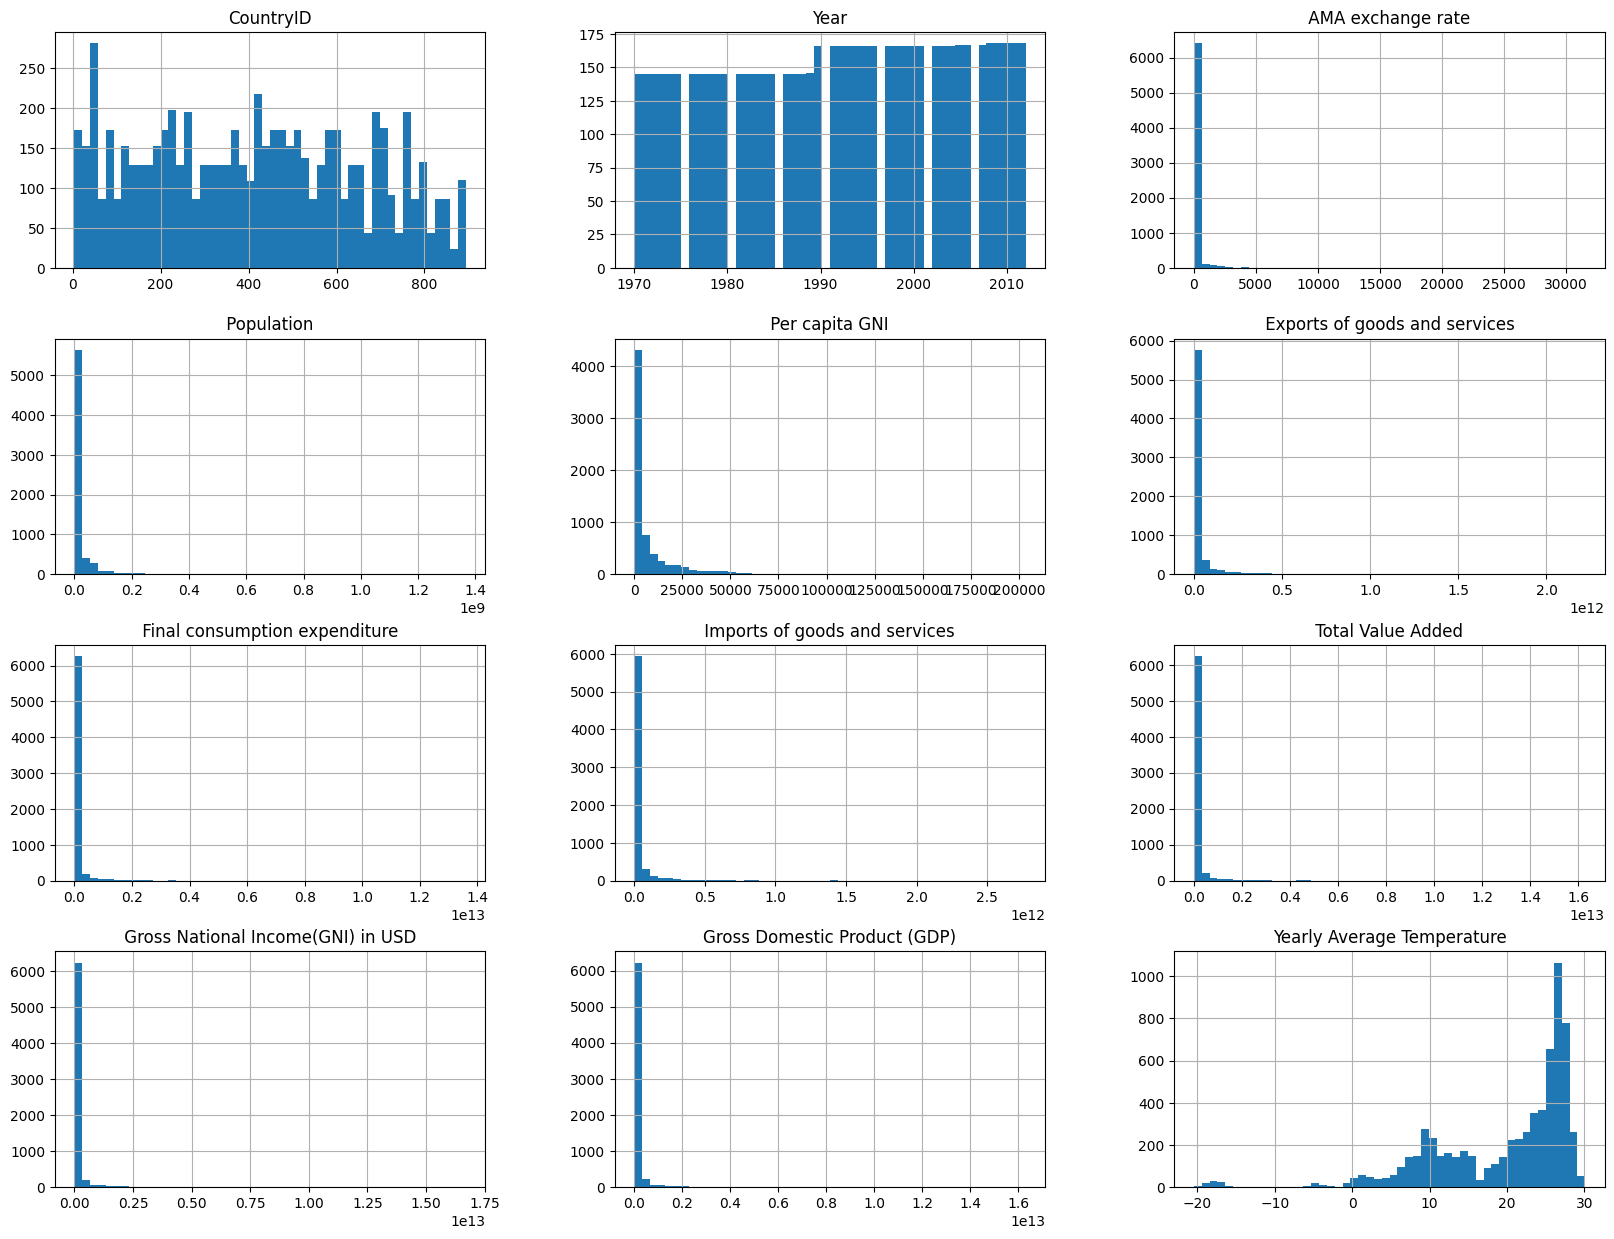

In [22]:
# !!! start of global diagrams and correlation !!!
%matplotlib inline
import matplotlib.pyplot as plt
economy_and_temperature_statistics.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='Yearly Average Temperature', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Year', ylabel='Yearly Average Temperature'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Year', ylabel='Gross Domestic Product (GDP)'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Year'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>]], dtype=object)

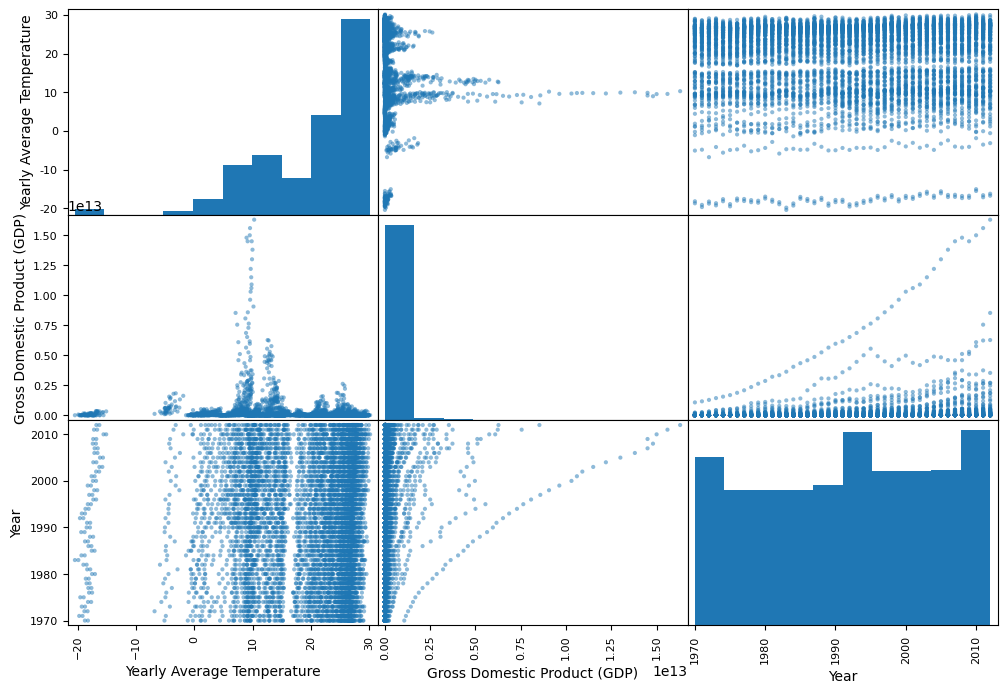

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["Yearly Average Temperature", "Gross Domestic Product (GDP)", "Year"]
scatter_matrix(economy_and_temperature_statistics[attributes], figsize=(12, 8))

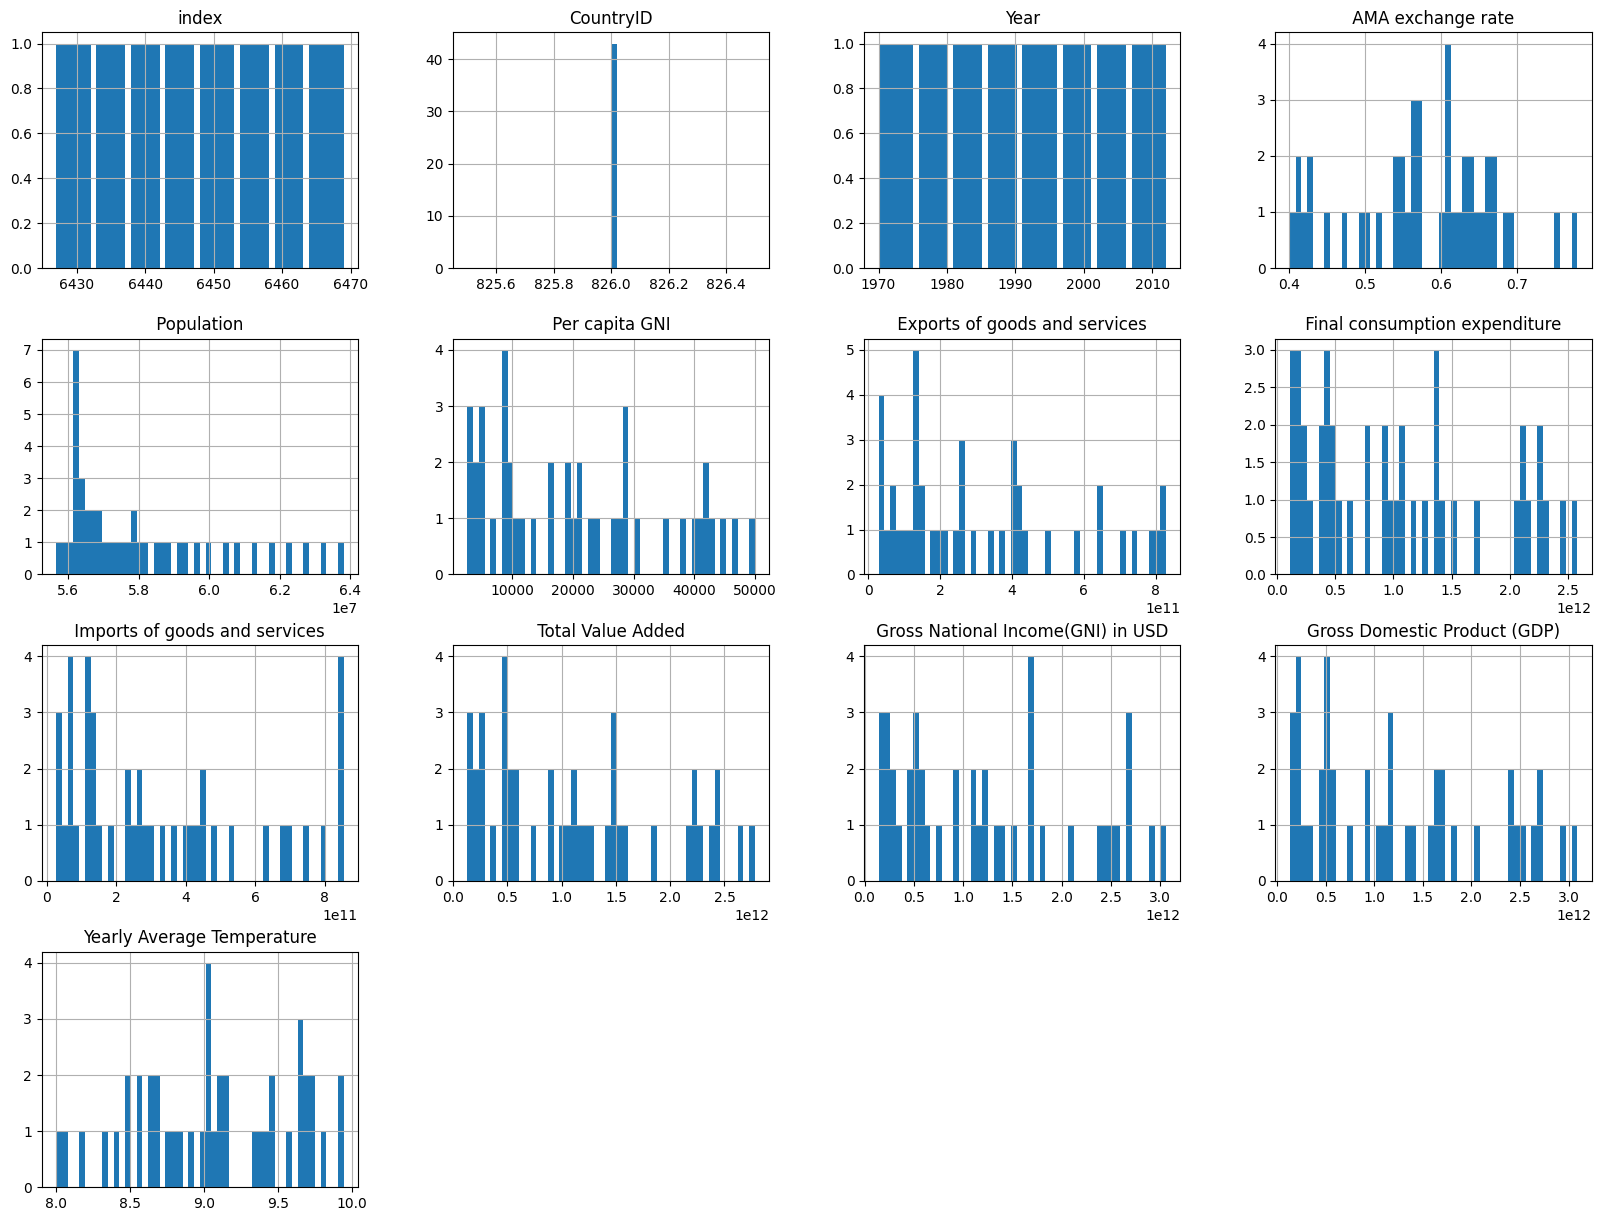

In [72]:
# !!! end of global diagrams and start of diagrams with one country !!!
economy_and_temperature_plaything_united_kingdom_only = economy_and_temperature_statistics.copy()[economy_and_temperature_statistics["Country"] == "United Kingdom"].drop("Country", axis=1).reset_index()
economy_and_temperature_plaything_united_kingdom_only.hist(bins=50, figsize=(20, 15))
plt.show() 

array([[<Axes: xlabel='Yearly Average Temperature', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Year', ylabel='Yearly Average Temperature'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Year', ylabel='Gross Domestic Product (GDP)'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Year'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>]], dtype=object)

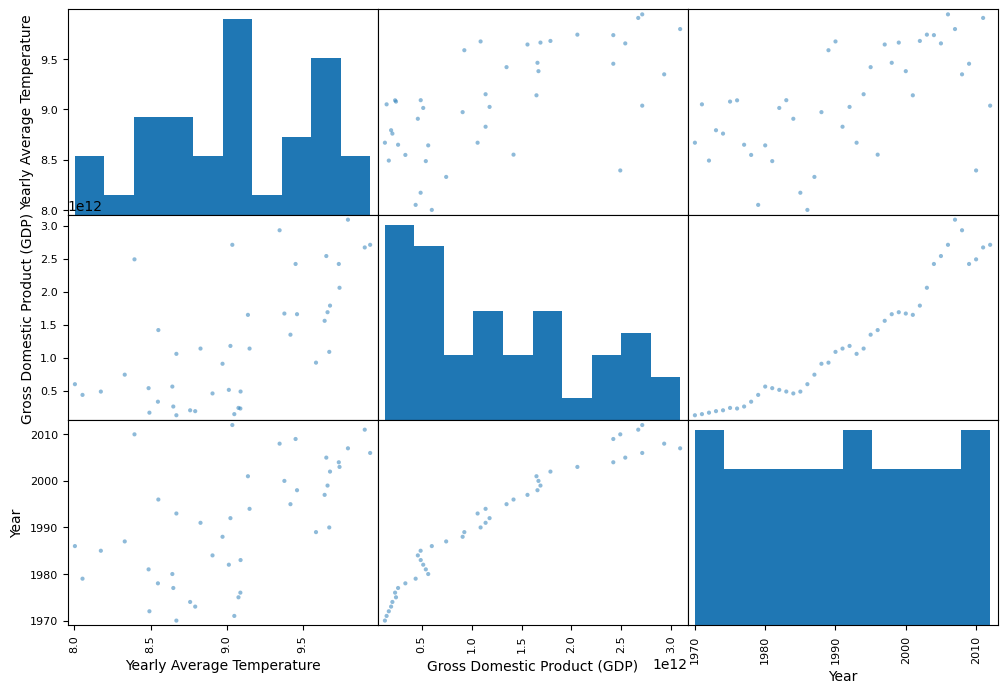

In [26]:
scatter_matrix(economy_and_temperature_plaything_united_kingdom_only[attributes], figsize=(12, 8))

In [73]:
economy_and_temperature_plaything = economy_and_temperature_statistics.copy().drop("Country", axis=1).reset_index()
corr_matrix = economy_and_temperature_plaything.corr()
corr_matrix["Yearly Average Temperature"].sort_values(ascending=False)

Yearly Average Temperature             1.000000
 AMA exchange rate                     0.101563
index                                  0.042437
CountryID                              0.041538
Year                                  -0.018307
 Population                           -0.072016
 Final consumption expenditure        -0.162061
 Total Value Added                    -0.162695
 Gross National Income(GNI) in USD    -0.167356
Gross Domestic Product (GDP)          -0.168081
 Imports of goods and services        -0.208335
 Exports of goods and services        -0.220195
 Per capita GNI                       -0.341903
Name: Yearly Average Temperature, dtype: float64

In [74]:
corr_matrix = economy_and_temperature_plaything_united_kingdom_only.corr()
corr_matrix["Yearly Average Temperature"].sort_values(ascending=False)

Yearly Average Temperature             1.000000
 Per capita GNI                        0.645655
 Gross National Income(GNI) in USD     0.635909
Gross Domestic Product (GDP)           0.635351
 Total Value Added                     0.631263
 Final consumption expenditure         0.628332
 Imports of goods and services         0.605554
 Exports of goods and services         0.594334
index                                  0.584927
Year                                   0.584927
 Population                            0.519996
 AMA exchange rate                     0.088568
CountryID                                   NaN
Name: Yearly Average Temperature, dtype: float64

In [29]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(economy_and_temperature_plaything, economy_and_temperature_plaything["Yearly Average Temperature"]):
    random_shuffle_train_set = economy_and_temperature_plaything.loc[train_index]
    random_shuffle_test_set = economy_and_temperature_plaything.loc[test_index]

random_shuffle_test_set["Yearly Average Temperature"].value_counts() / len(random_shuffle_test_set)
for set_ in (random_shuffle_train_set, random_shuffle_test_set): 
    set_.drop("Yearly Average Temperature", axis=1, inplace=True)

economy_and_temperature_plaything = random_shuffle_train_set.drop("Gross Domestic Product (GDP)", axis=1)
economy_and_temperature_plaything_labels = random_shuffle_train_set["Gross Domestic Product (GDP)"].copy()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

economy_and_temperature_plaything_test = economy_and_temperature_plaything.copy()
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
economy_and_temperature_plaything_transformed = num_pipeline.fit_transform(economy_and_temperature_plaything_test)

In [31]:
from sklearn.compose import ColumnTransformer 
num_attribs = list(economy_and_temperature_plaything)
full_pipeline = ColumnTransformer([
     ("num", num_pipeline, num_attribs)
 ])
economy_and_temperature_plaything_prepared = full_pipeline.fit_transform(economy_and_temperature_plaything)

In [32]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels)

LinearRegression()

In [33]:
some_data = economy_and_temperature_plaything.iloc[:5]
some_labels = economy_and_temperature_plaything_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2.05031026e+11 7.13509490e+10 1.84852965e+09 2.61839321e+10
 4.16166828e+09]
Labels: [194000000000.0, 71272755267.0, 1677283180.0, 27145652980.0, 3874553066.0]


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np
GDP_predictions = lin_reg.predict(economy_and_temperature_plaything_prepared)
lin_mse = mean_squared_error(economy_and_temperature_plaything_labels, GDP_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10151448775.239994

In [35]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels)

DecisionTreeRegressor()

In [36]:
GDP_predictions = tree_reg.predict(economy_and_temperature_plaything_prepared)
tree_mse = mean_squared_error(economy_and_temperature_plaything_labels, GDP_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [38]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.95120615e+10 2.62376529e+10 4.34816832e+10 4.74691499e+10
 3.54578160e+10 3.50178169e+10 7.14184906e+10 1.06147874e+10
 4.67398509e+10 6.20028421e+10]
Mean: 40795215125.21919
Standard deviation: 16693118949.204401


In [39]:
lin_scores = cross_val_score(lin_reg, economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.24610418e+10 7.34099243e+09 9.48681343e+09 1.05138901e+10
 1.17766184e+10 8.37253587e+09 1.49932822e+10 8.22576489e+09
 9.53968331e+09 1.29853429e+10]
Mean: 10569596527.267399
Standard deviation: 2311277619.6662016


In [40]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels)

RandomForestRegressor()

In [41]:
GDP_predictions = forest_reg.predict(economy_and_temperature_plaything_prepared)
forest_mse = mean_squared_error(economy_and_temperature_plaything_labels, GDP_predictions) 
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

In [42]:
scores = cross_val_score(forest_reg, economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [1.66243272e+10 1.05525536e+10 1.43436874e+10 3.42169046e+10
 1.48879423e+10 2.01936441e+10 5.15110367e+10 6.97008739e+09
 1.39698445e+10 2.19258534e+10]
Mean: 20519588122.890762
Standard deviation: 12494119887.072891


In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_

{'n_estimators': 30, 'max_features': 4}

In [45]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.31422754e-02, 9.98615431e-05, 3.11100615e-03, 1.38020886e-03,
       3.37316833e-02, 9.55885066e-03, 2.90924989e-02, 2.56010235e-01,
       8.81165676e-02, 2.04838840e-01, 3.40917973e-01])

In [46]:
attributes = num_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3409179726918963, ' Gross National Income(GNI) in USD '),
 (0.2560102351215447, ' Final consumption expenditure '),
 (0.20483883976552436, ' Total Value Added '),
 (0.08811656759457868, ' Imports of goods and services '),
 (0.03373168333916833, ' Population '),
 (0.03314227540018595, 'index'),
 (0.029092498875702356, ' Exports of goods and services '),
 (0.009558850664193173, ' Per capita GNI '),
 (0.0031110061455876096, 'Year'),
 (0.0013802088584723823, ' AMA exchange rate '),
 (9.98615431460706e-05, 'CountryID')]

In [47]:
# evaluating the final model using the test dataset
final_model = grid_search.best_estimator_
X_test = random_shuffle_test_set.drop("Gross Domestic Product (GDP)", axis=1)
y_test = random_shuffle_test_set["Gross Domestic Product (GDP)"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_predictions

array([4.10165150e+08, 6.66455436e+08, 2.16033333e+11, ...,
       1.37909647e+09, 1.47931602e+10, 1.99644250e+10])

In [48]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([1.34446745e+10, 2.76666203e+10])

In [49]:
# I'm now going to create another model that focuses on just one country
economy_and_temperature_plaything_united_kingdom_only.reset_index()

level_0  index  CountryID  Year   AMA exchange rate    Population   \
0         0   6427        826  1970             0.416667      55650166   
1         1   6428        826  1971             0.410920      55875903   
2         2   6429        826  1972             0.400390      56057315   
3         3   6430        826  1973             0.408171      56166630   
4         4   6431        826  1974             0.427756      56233776   
5         5   6432        826  1975             0.452041      56266842   
6         6   6433        826  1976             0.556510      56263232   
7         7   6434        826  1977             0.573272      56244840   
8         8   6435        826  1978             0.521505      56240768   
9         9   6436        826  1979             0.472181      56265154   
10       10   6437        826  1980             0.430295      56326328   
11       11   6438        826  1981             0.497641      56395846   
12       12   6439        826  1982             0.572447      56450133   
13       13   6440        826  1983             0.659725      56501612   
14       14   6441        826  1984             0.751807      56568253   
15       15   6442        826  1985             0.779246      56643045   
16       16   6443        826  1986             0.682197      56721909   
17       17   6444        826  1987             0.611927      56826322   
18       18   6445        826  1988             0.562170      56952648   
19       19   6446        826  1989             0.611173      57076099   
20       20   6447        826  1990             0.563177      57210442   
21       21   6448        826  1991             0.567015      57359454   
22       22   6449        826  1992             0.569774      57509240   
23       23   6450        826  1993             0.666757      57647463   
24       24   6451        826  1994             0.653427      57785900   
25       25   6452        826  1995             0.633668      57930364   
26       26   6453        826  1996             0.640958      58078586   
27       27   6454        826  1997             0.610836      58250198   
28       28   6455        826  1998             0.603824      58438321   
29       29   6456        826  1999             0.618057      58635202   
30       30   6457        826  2000             0.660931      58850043   
31       31   6458        826  2001             0.694655      59092016   
32       32   6459        826  2002             0.667223      59355690   
33       33   6460        826  2003             0.612472      59649799   
34       34   6461        826  2004             0.546180      59995851   
35       35   6462        826  2005             0.549998      60383741   
36       36   6463        826  2006             0.543487      60803700   
37       37   6464        826  2007             0.499772      61260676   
38       38   6465        826  2008             0.543966      61742151   
39       39   6466        826  2009             0.641919      62243378   
40       40   6467        826  2010             0.647179      62760039   
41       41   6468        826  2011             0.624141      63286362   
42       42   6469        826  2012             0.633047      63808727   

     Per capita GNI    Exports of goods and services   \
0               2546                     2.848948e+10   
1               2862                     3.241058e+10   
2               3272                     3.506156e+10   
3               3706                     4.320986e+10   
4               4000                     5.527475e+10   
5               4739                     6.138623e+10   
6               4561                     6.513885e+10   
7               5089                     7.803483e+10   
8               6471                     9.406251e+10   
9               8367                     1.200000e+11   
10             10662                     1.500000e+11   
11             10129                     1.400000e+11   
12    

In [50]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(economy_and_temperature_plaything_united_kingdom_only, economy_and_temperature_plaything_united_kingdom_only["Yearly Average Temperature"]):
    strat_shuffle_train_set = economy_and_temperature_plaything_united_kingdom_only.loc[train_index]
    strat_shuffle_test_set = economy_and_temperature_plaything_united_kingdom_only.loc[test_index]

strat_shuffle_test_set["Yearly Average Temperature"].value_counts() / len(strat_shuffle_test_set)
for set_ in (strat_shuffle_train_set, strat_shuffle_test_set): 
    set_.drop("Yearly Average Temperature", axis=1, inplace=True)

economy_and_temperature_plaything_united_kingdom_only = strat_shuffle_train_set.drop("Gross Domestic Product (GDP)", axis=1)
economy_and_temperature_plaything_united_kingdom_only_labels = strat_shuffle_train_set["Gross Domestic Product (GDP)"].copy()

In [51]:
economy_and_temperature_plaything_united_kingdom_only_test = economy_and_temperature_plaything.copy()

In [52]:
economy_and_temperature_plaything_transformed = num_pipeline.fit_transform(economy_and_temperature_plaything_united_kingdom_only_test)

In [53]:
num_attribs = list(economy_and_temperature_plaything_united_kingdom_only)
full_pipeline = ColumnTransformer([
     ("num", num_pipeline, num_attribs)
 ])
economy_and_temperature_plaything_united_kingdom_only_prepared = full_pipeline.fit_transform(economy_and_temperature_plaything_united_kingdom_only)

In [54]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(economy_and_temperature_plaything_united_kingdom_only_prepared, economy_and_temperature_plaything_united_kingdom_only_labels)

LinearRegression()

In [55]:
some_data = economy_and_temperature_plaything_united_kingdom_only.iloc[:5]
some_labels = economy_and_temperature_plaything_united_kingdom_only_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [1.91157990e+11 2.48850570e+11 1.55398470e+12 1.64495405e+12
 9.31280210e+11]
Labels: [193000000000.0, 233000000000.0, 1560000000000.0, 1650000000000.0, 927000000000.0]


In [56]:
GDP_predictions = lin_reg.predict(economy_and_temperature_plaything_united_kingdom_only_prepared)
lin_mse = mean_squared_error(economy_and_temperature_plaything_united_kingdom_only_labels, GDP_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

11061403769.66049

In [57]:
lin_scores = cross_val_score(lin_reg, economy_and_temperature_plaything_united_kingdom_only_prepared, economy_and_temperature_plaything_united_kingdom_only_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.14707996e+10 1.13472542e+10 7.60426218e+09 2.80287814e+10
 1.09182450e+10 2.10242864e+10 1.45249578e+10 2.56749922e+10
 1.02597770e+10 2.47092283e+10]
Mean: 16556258410.418665
Standard deviation: 7140708563.476087


In [58]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(economy_and_temperature_plaything_united_kingdom_only_prepared, economy_and_temperature_plaything_united_kingdom_only_labels)

DecisionTreeRegressor()

In [59]:
GDP_predictions = tree_reg.predict(economy_and_temperature_plaything_united_kingdom_only_prepared)
tree_mse = mean_squared_error(economy_and_temperature_plaything_united_kingdom_only_labels, GDP_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [60]:
scores = cross_val_score(tree_reg, economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [3.03670308e+10 2.39847855e+10 2.36557149e+10 4.50342188e+10
 3.25228075e+10 3.18438146e+10 4.83671921e+10 1.07672099e+10
 3.01420108e+10 6.54346572e+10]
Mean: 34211944206.025593
Standard deviation: 14483935016.262863


In [61]:
forest_reg = RandomForestRegressor()
forest_reg.fit(economy_and_temperature_plaything_united_kingdom_only_prepared, economy_and_temperature_plaything_united_kingdom_only_labels)

RandomForestRegressor()

In [62]:
GDP_predictions = forest_reg.predict(economy_and_temperature_plaything_united_kingdom_only_prepared)
forest_mse = mean_squared_error(economy_and_temperature_plaything_united_kingdom_only_labels, GDP_predictions) 
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

In [63]:
scores = cross_val_score(tree_reg, economy_and_temperature_plaything_united_kingdom_only_prepared, economy_and_temperature_plaything_united_kingdom_only_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [5.43806032e+10 7.66909382e+10 8.45547160e+10 1.22870867e+11
 7.07153920e+10 3.82491830e+10 1.71059444e+11 2.78433714e+11
 3.28125992e+10 1.40456399e+11]
Mean: 107022385596.49763
Standard deviation: 71135497335.96143


In [64]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(economy_and_temperature_plaything_united_kingdom_only_prepared, economy_and_temperature_plaything_united_kingdom_only_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
final_model = grid_search.best_estimator_
X_test = strat_shuffle_test_set.drop("Gross Domestic Product (GDP)", axis=1)
y_test = strat_shuffle_test_set["Gross Domestic Product (GDP)"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_predictions

array([2.77600000e+12, 1.16833333e+12, 1.40866667e+12, 2.64900000e+12,
       2.34400000e+12, 2.56800000e+12, 2.31466667e+11, 5.02366667e+11,
       2.84466667e+11])

In [68]:
confidence = 0.8
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([2.07193357e+10, 1.73700626e+11])